<a href="https://colab.research.google.com/github/Heoyuna0819/deeplearning/blob/main/DL_classification_car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

file_path = "/content/drive/MyDrive/car_evaluation.csv"
df = pd.read_csv(file_path)

df.columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']

df


,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1727 non-null   object
 1   maint         1727 non-null   object
 2   doors         1727 non-null   object
 3   persons       1727 non-null   object
 4   lug_capacity  1727 non-null   object
 5   safety        1727 non-null   object
 6   output        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [116]:
#결측지 확인

df.isnull().sum()


,0
price,0
maint,0
doors,0
persons,0
lug_capacity,0
safety,0
output,0


In [117]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
price,0
maint,0
doors,0
persons,0
lug_capacity,0
safety,0
output,0


In [118]:
# 레이블 확인

df['output'].value_counts()

,count
output,
unacc,1209
acc,384
good,69
vgood,65


In [119]:
label_encoders = {}
for col in df.columns:
    if col != 'output':  # output은 제외
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
print(df.head())

   price  maint  doors  persons  lug_capacity  safety output
0      3      3      0        0             2       2  unacc
1      3      3      0        0             2       0  unacc
2      3      3      0        0             1       1  unacc
3      3      3      0        0             1       2  unacc
4      3      3      0        0             1       0  unacc


In [120]:
X=df.drop('output', axis=1)
X.head()

,price,maint,doors,persons,lug_capacity,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [121]:
y=df['output']
y.value_counts()  #분류 문제에서 클래스 분포 확인용
y.head()

,output
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [122]:
#원핫 인코딩
Y = pd.get_dummies(y).values

In [123]:
 X = X.values
 X

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [124]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1381, 6), (346, 6), (1381, 4), (346, 4))

In [125]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(32,input_shape=(6,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,548 (17.77 KB)

 Trainable params: 4,548 (17.77 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6543 - loss: 0.7729 - val_accuracy: 0.6908 - val_loss: 0.5956
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7341 - loss: 0.5644 - val_accuracy: 0.8121 - val_loss: 0.5873
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8067 - loss: 0.4525 - val_accuracy: 0.8266 - val_loss: 0.4155
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8075 - loss: 0.4273 - val_accuracy: 0.8295 - val_loss: 0.5372
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8503 - loss: 0.3715 - val_accuracy: 0.8584 - val_loss: 0.3043
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8898 - loss: 0.2959 - val_accuracy: 0.8526 - val_loss: 0.3193
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8913 - loss: 0.2685 - val_accuracy: 0.8931 - val_loss: 0.2500
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9053 - loss: 0.2220 - val_accuracy: 0.8960 - val_lo

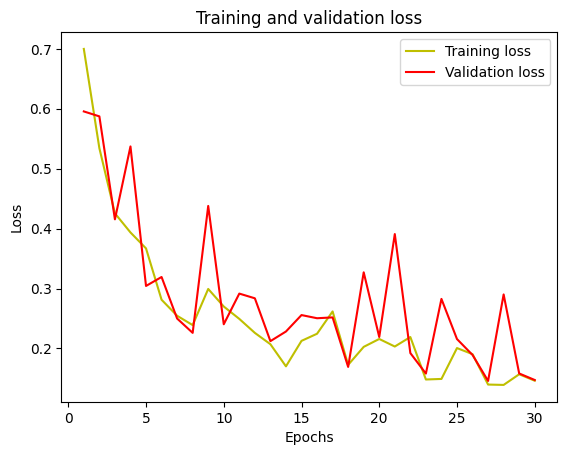

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


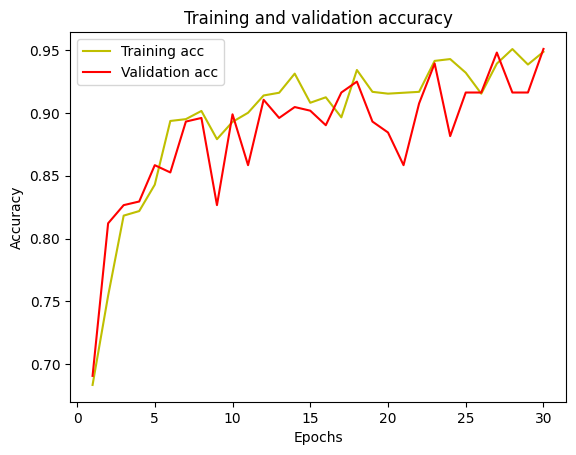

In [127]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [128]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        77
           1       0.92      0.79      0.85        14
           2       0.96      1.00      0.98       239
           3       0.81      0.81      0.81        16

    accuracy                           0.95       346
   macro avg       0.91      0.87      0.89       346
weighted avg       0.95      0.95      0.95       346

[[ 67   0  10   0]
 [  0  11   0   3]
 [  1   0 238   0]
 [  2   1   0  13]]


In [129]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2651 - loss: 1.2386  


[1.258590579032898, 0.2572254240512848]